In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [6]:
import sqlite3

conn = sqlite3.connect('../db.sqlite3')

query = """
    SELECT
        o.id AS order_id,
        o.datetime AS order_datetime,
        oi.id AS orderitem_id,
        oi.quantity,
        p.id AS product_id,
        p.price,
        p.name
    FROM restaurant_orderitem oi
    JOIN restaurant_order o ON oi.order_id = o.id
    JOIN restaurant_product p ON oi.product_id = p.id
"""

data = pd.read_sql_query(query, conn)

conn.close()

data.to_csv('combined_data.csv', index=False)

# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

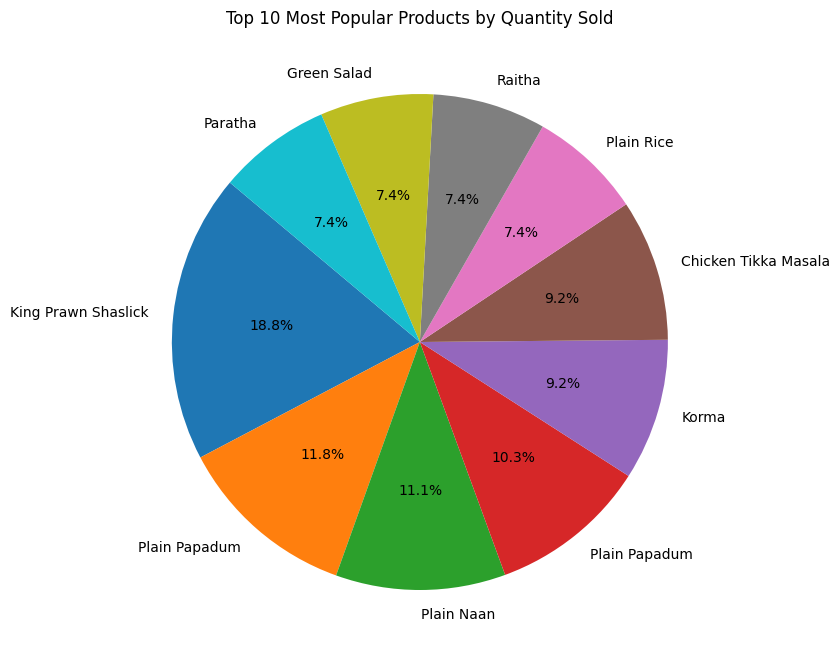

In [8]:
top_10_products = data[["name", "quantity"]].nlargest(10, columns="quantity")
plt.figure(figsize=(8, 10))
plt.pie(top_10_products["quantity"], labels=top_10_products["name"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Products by Quantity Sold")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

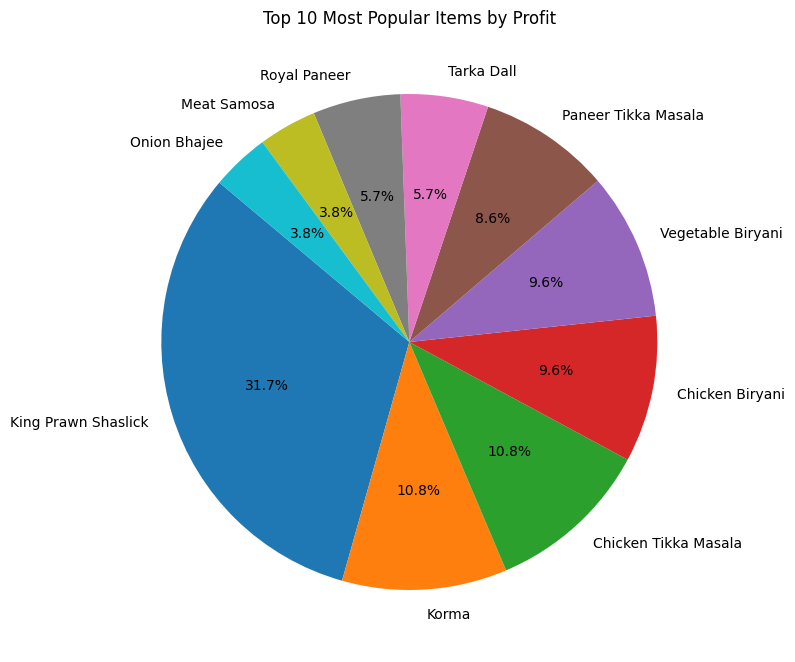

In [9]:
data["item price"] = data["price"] * data["quantity"]
top_10_products = data[["item price", "name"]].nlargest(10, columns="item price")

plt.figure(figsize=(8, 10))
plt.pie(top_10_products["item price"], labels=top_10_products["name"], autopct="%1.1f%%", startangle=140)
plt.title("Top 10 Most Popular Items by Profit")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

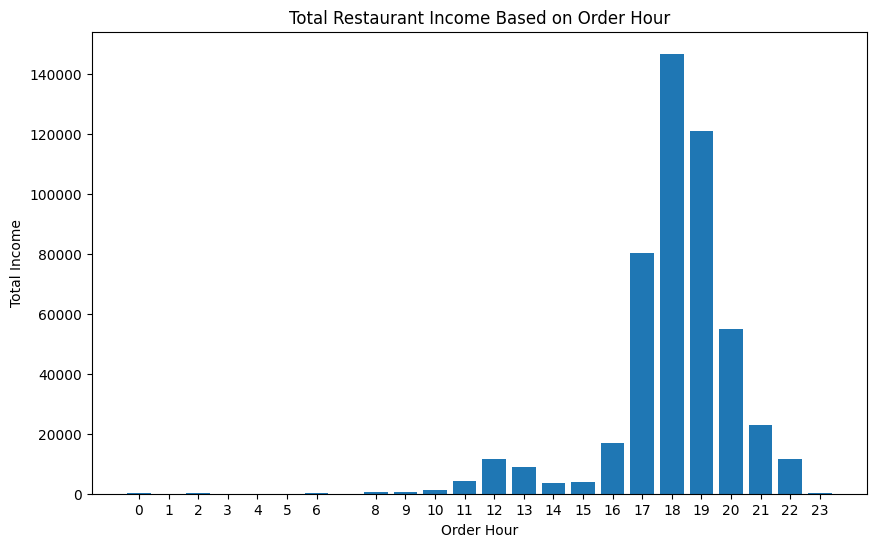

In [10]:
data["order_datetime"] = pd.to_datetime(data["order_datetime"])

data["order_hour"] = data["order_datetime"].dt.hour

hourly_income = data.groupby("order_hour")["quantity"].sum() * data.groupby("order_hour")["price"].mean()

plt.figure(figsize=(10, 6))
plt.bar(hourly_income.index, hourly_income.values)
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income Based on Order Hour")
plt.xticks(hourly_income.index)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

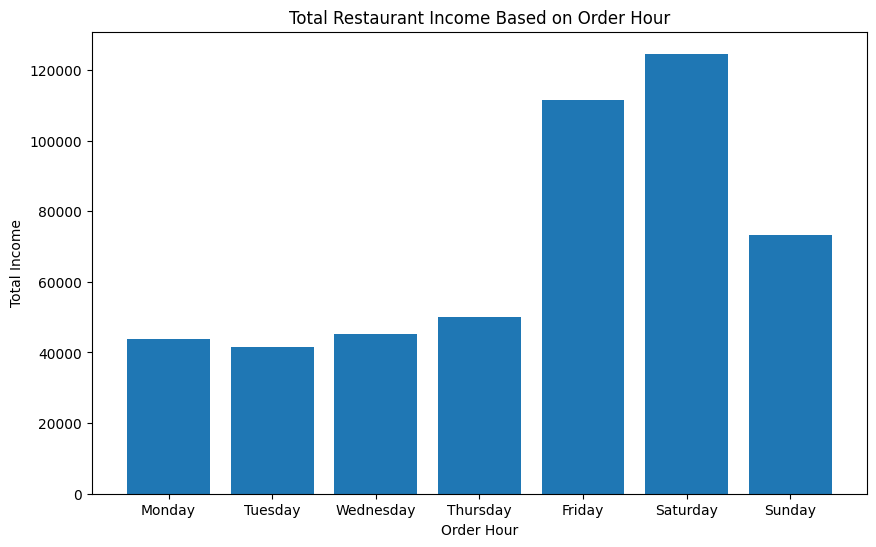

In [12]:
data["order_week"] = data["order_datetime"].dt.dayofweek

hourly_income = data.groupby("order_week")["quantity"].sum() * data.groupby("order_week")["price"].mean()

plt.figure(figsize=(10, 6))
plt.bar(hourly_income.index, hourly_income.values)
plt.xlabel("Order Hour")
plt.ylabel("Total Income")
plt.title("Total Restaurant Income Based on Order Hour")
plt.xticks(range(7), ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
plt.show()